In [1]:
import numpy as np
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import string
from wordcloud import WordCloud, STOPWORDS

### The imported csv file contains the YouTube videos and channels that have been pulled from YouTube API and cleaned accordingly. 

In [2]:
df_video_channel = pd.read_csv('D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/video_channel_export.csv', encoding= "ISO-8859-1")

C:\Users\EliEm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,3,4,5,7,8,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_video_channel.head(3)

,Unnamed: 0,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,channel_description,channel_etag
0,0,Zqv5CBWt9yA,2018-06-14 00:00:00,Bhuvan Bam- Safar | Official Music Video |,BB Ki Vines,Entertainment,24.0,2018-06-13 07:13:43,"safar|""travel""|""bhuvan bam""|""music""|""journey""|...",3854712.0,...,14650.0,55735.0,https://i.ytimg.com/vi/Zqv5CBWt9yA/default.jpg,False,False,False,Bhuvan Bam releases his 3rd single 'Safar' in ...,IN,BB Ki Vines is about BB and some funny instanc...,"""0UM_wBUsFuT6ekiIlwaHvyqc80M/5yXczLj4QG1sbTSVO..."
1,1,g2orJgNOpnU,2018-06-13 00:00:00,BB Ki Vines- | Alvida Dost |,BB Ki Vines,Entertainment,24.0,2018-06-06 12:02:47,"friends|""fight""|""humour""|""funny""|""comedy""|""bhu...",10433510.0,...,17155.0,68078.0,https://i.ytimg.com/vi/g2orJgNOpnU/default.jpg,False,False,False,Is this the last time BB and Bancho talk? A he...,IN,BB Ki Vines is about BB and some funny instanc...,"""0UM_wBUsFuT6ekiIlwaHvyqc80M/5yXczLj4QG1sbTSVO..."
2,2,T9WN2_ikz6Q,2018-04-15 00:00:00,BB Ki Vines- | The Sacrifice |,BB Ki Vines,Entertainment,24.0,2018-04-09 10:21:36,"sacrifice|""parents""|""laptop""|""office""|""bonus""|...",7769007.0,...,9373.0,125740.0,https://i.ytimg.com/vi/T9WN2_ikz6Q/default.jpg,False,False,False,Dad's got a bonus from office. How will he spe...,IN,BB Ki Vines is about BB and some funny instanc...,"""0UM_wBUsFuT6ekiIlwaHvyqc80M/5yXczLj4QG1sbTSVO..."


In [4]:
df_video_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99201 entries, 0 to 99200
Data columns (total 21 columns):
Unnamed: 0                99201 non-null object
video_id                  58913 non-null object
trending_date             58910 non-null object
title                     58913 non-null object
channel_title             58770 non-null object
category                  58639 non-null object
category_id               58770 non-null float64
publish_time              58770 non-null object
tags                      58770 non-null object
views                     58770 non-null float64
likes                     58770 non-null float64
dislikes                  58770 non-null float64
comment_count             58770 non-null float64
thumbnail_link            58770 non-null object
comments_disabled         58770 non-null object
ratings_disabled          58770 non-null object
video_error_or_removed    58770 non-null object
description               57273 non-null object
country               

#### We are looking into 'views' column in our project mainly. We have to drop the records with the empty/null value of views 

In [3]:
data = df_video_channel.dropna(subset = ['views'])

In [6]:
views = np.array(data['views'])
len(views)

58770

In [7]:
x = data[['views','country']].groupby('country').sum().sort_values(by='views')
x

,views
country,
JP,2.210588e+08
KR,5.607039e+08
FR,1.971950e+09
MX,2.011620e+09
DE,3.328813e+09
IN,5.110429e+09
US,5.294185e+09
CA,5.716093e+09
GB,7.298388e+09


## Youtube upload percentage

### The following pie chart represents the upload percentage of YouTube videos in dataset. Denmark and South Korea has the larget and lowest number of records in dataset respectively.

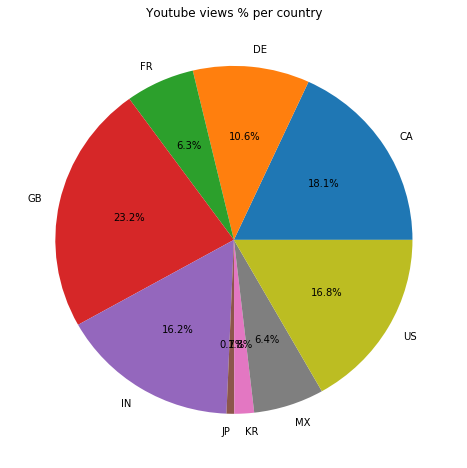

In [8]:
df_temp = data.reset_index().sort_values('trending_date')

labels = df_temp.groupby(['country']).count().index
#sizes = df_temp.groupby(['country']).count()['views']
sizes = df_temp[['views','country']].groupby('country').sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, labeldistance=1.1, autopct='%1.1f%%',shadow=False)
plt.title("Youtube views % per country", fontsize=12)
plt.show()

In [9]:
data_corr = data
data_corr['video_title_count_word'] = data['title'].apply(lambda x: len(str(x).split()))
data_corr['video_tags_count_word'] = data["tags"].apply(lambda x: len(str(x).split()))
#Unique word count
data_corr['count_unique_word']=data["title"].apply(lambda x: len(set(str(x).split())))
data_corr['count_unique_word_tags']=data["tags"].apply(lambda x: len(set(str(x).split())))
data_corr["video_title_count_punctuations"] = data["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
data_corr["video_tag_count_punctuations"] =data["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

data_corr["video_title_count_words_upper"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
data_corr["video_tag_count_words_upper"] = data["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
data_corr["video_title_count_words_title"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
data_corr["video_tage_count_words_title"] = data["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

data_corr['cahnnel_title_len'] = data['channel_title'].apply(lambda x: len(str(x).split()))


C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### The following correlation matrix has diplayed between "Views", "Likes", "Dislikes" and "Comment_count". There is strong correlation "Likes" and "Views", so we can conclude if the video get more positove feedback by "Like", there is more chance to be viewed more.


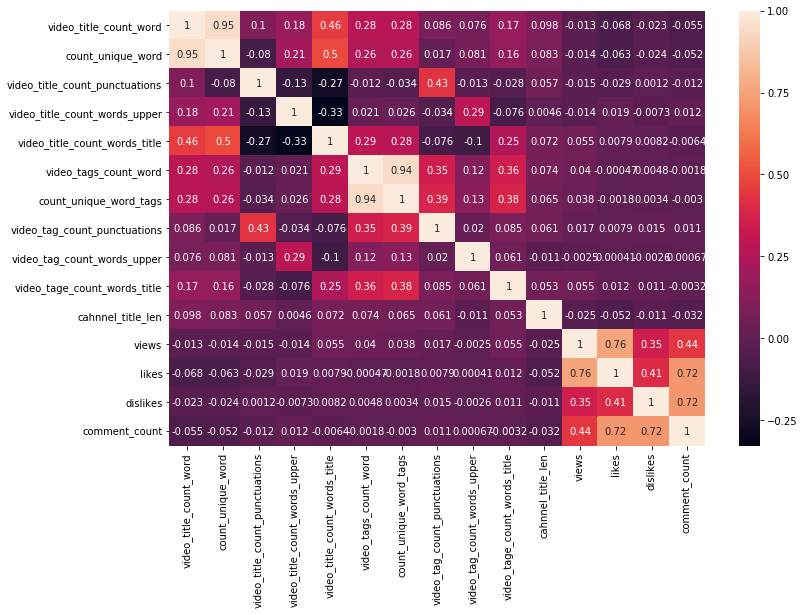

In [10]:
plt.figure(figsize = (12,8))

sns.heatmap(data_corr[['video_title_count_word', 'count_unique_word', 'video_title_count_punctuations',
                       "video_title_count_words_upper",'video_title_count_words_title',
                       'video_tags_count_word','count_unique_word_tags' ,
                     "video_tag_count_punctuations", "video_tag_count_words_upper", 
                      'video_tage_count_words_title','cahnnel_title_len',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed',
                      'views','likes', 'dislikes', 'comment_count']].corr(), annot=True)
plt.show()

### Scatter plot for Likes and Views

- The scatter plot between "views" attribute and "likes", "dislikes" and "comment_count" has displayed as following groupped by each country. We can see the correlation between "views" and "likes" are more than correlation between"views" and "dislikes" and also correlation between "views" and "comment_counts".

### - Scatter plot for "views" vs "Likes"

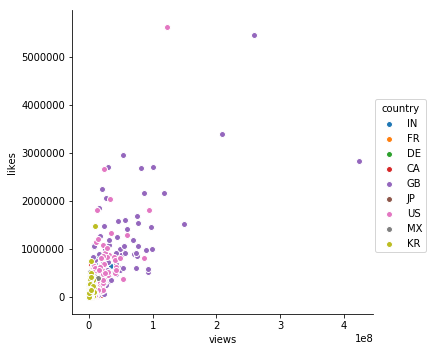

In [11]:
sns.pairplot(x_vars=['views'], y_vars=['likes'], data=data, hue="country", size=5)

### - Scatter plot for "views" vs "comment_count"

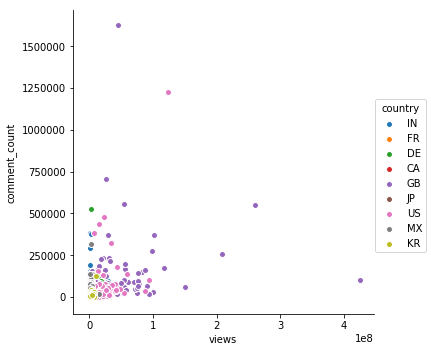

In [12]:
sns.pairplot(x_vars=['views'], y_vars=['comment_count'], data=data, hue="country", size=5)

### - Scatter plot for "views" vs "dislikes"

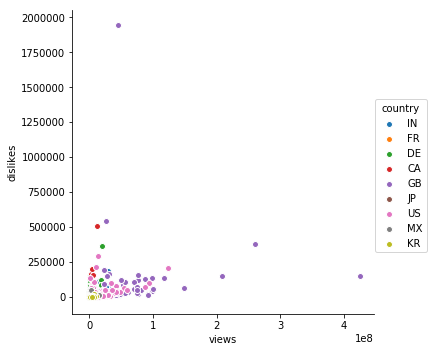

In [13]:
sns.pairplot(x_vars=['views'], y_vars=['dislikes'], data=data, hue="country", size=5)

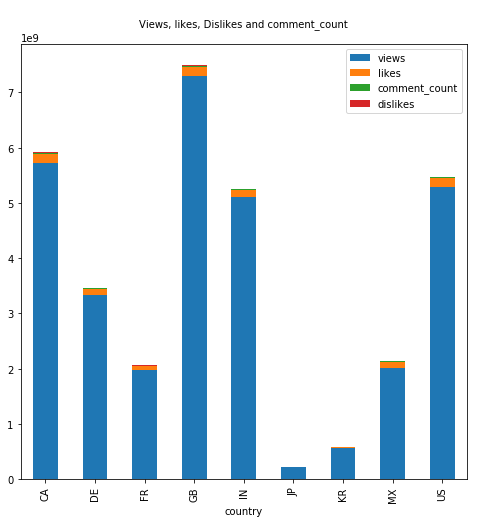

In [14]:
list = data[["country", "views", "likes", "comment_count", "dislikes"]].groupby("country").sum()
title = "\nViews, likes, Dislikes and comment_count\n"

list.plot.bar(stacked=True, figsize=(8,8))
plt.title(title, fontsize=10)
plt.legend( fontsize  = 10)
plt.show()

### The best 20 videos viewed on Youtube

- The top viewed videos have been displayed in the following bar chart with the number visits.

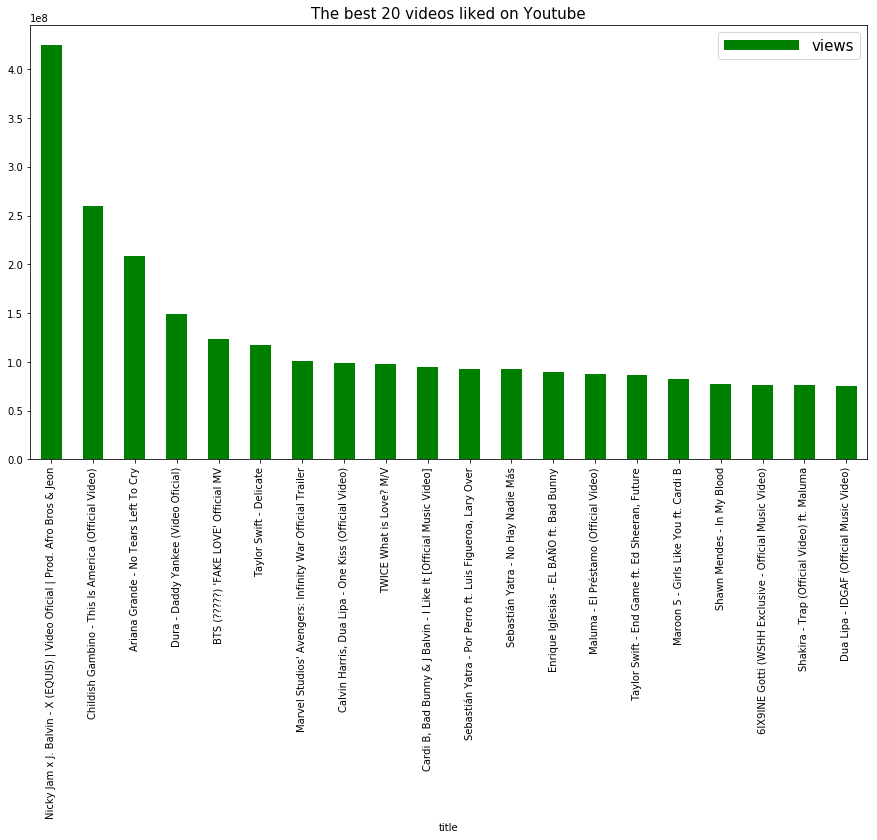

In [15]:
list = data[["title","views"]].sort_values(by="views",ascending=True)

list.sort_values(by="views",ascending=False).set_index("title").head(20).plot.bar(figsize=(15,8), color = 'g')
plt.title("The best 20 videos liked on Youtube", fontsize=15)
plt.legend(handlelength=5, fontsize  = 15)
plt.show()

### The best 20 videos have been liked on Youtube

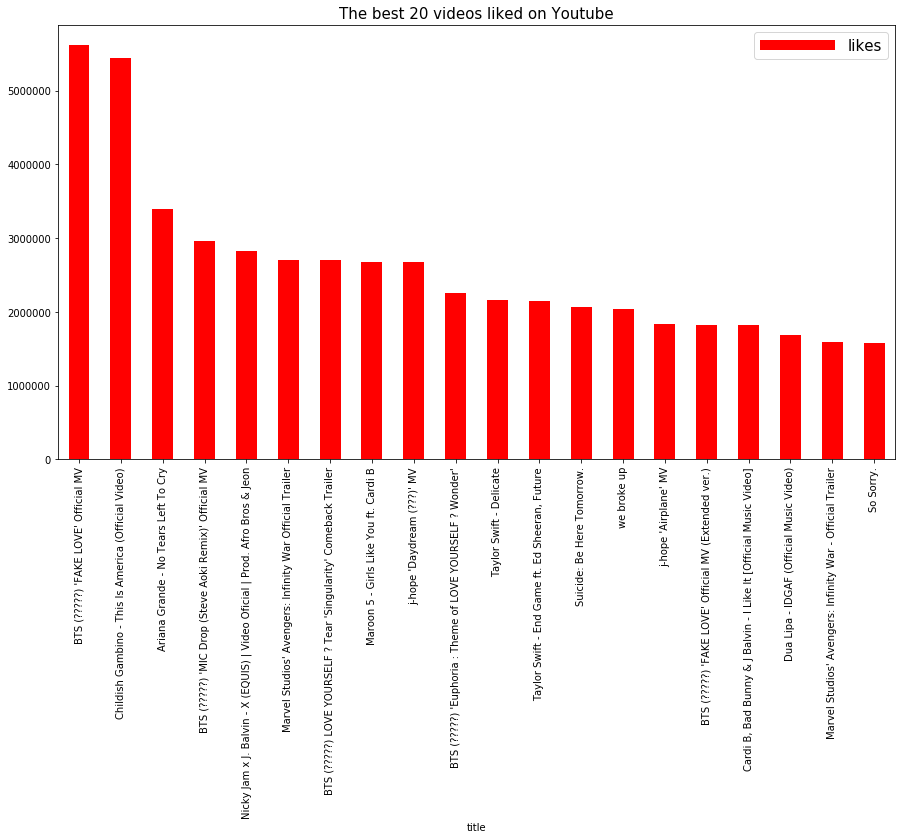

In [16]:
list = data[["title","likes"]].sort_values(by="likes",ascending=True)

list.sort_values(by="likes",ascending=False).set_index("title").head(20).plot.bar(figsize=(15,8), color = 'r')
plt.title("The best 20 videos liked on Youtube", fontsize=15)
plt.legend(handlelength=5, fontsize  = 15)
plt.show()

### The best 20 Entertaintment videos on Youtube

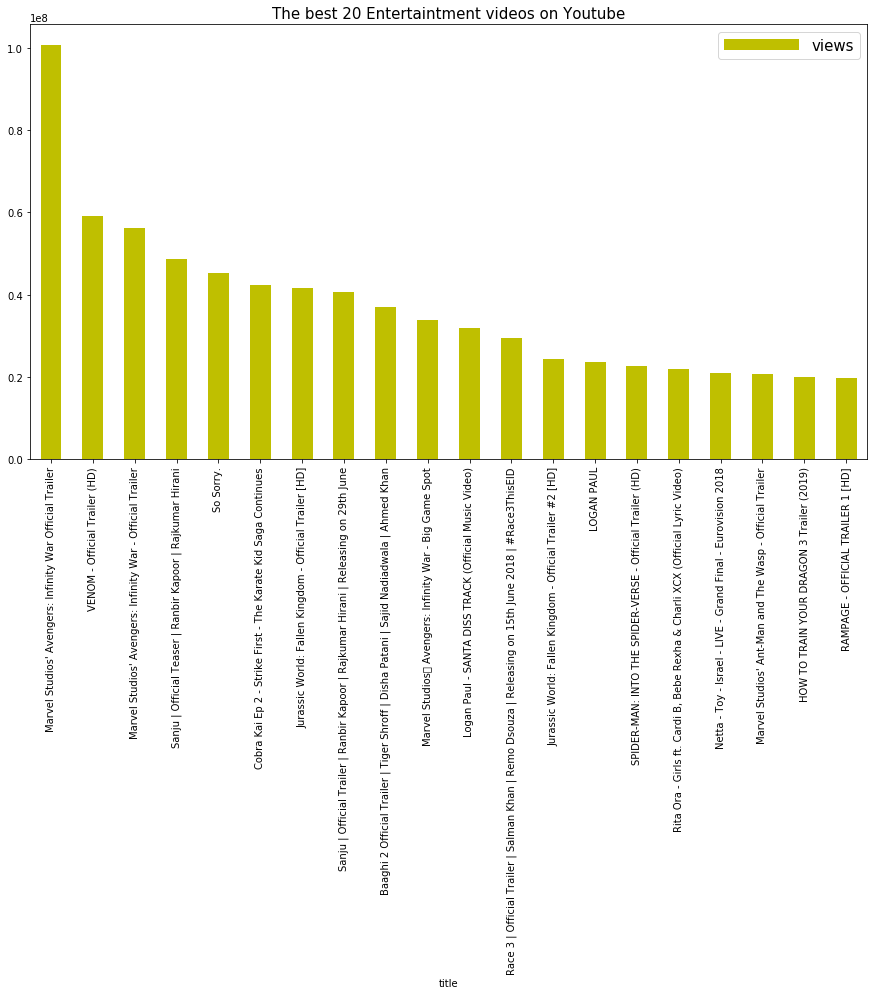

In [17]:
list = data[data["category"] == "Entertainment"][["title","views"]].sort_values(by="views",ascending=True)


list.sort_values(by="views",ascending=False).set_index("title").head(20).plot.bar(figsize=(15,8), color = 'y')
plt.title("The best 20 Entertaintment videos on Youtube", fontsize=15)
plt.legend(handlelength=5, fontsize  = 15)
plt.show()

In [18]:
data['trending_date_dt'] = pd.to_datetime(data['trending_date'],errors='coerce')
data["trending_date_month"]= data["trending_date_dt"].dt.strftime("%B")
data["trending_date_month_num"]= data["trending_date_dt"].dt.month
data["trending_date_day"]= data["trending_date_dt"].dt.strftime("%A")
data["trending_date_year"]= data["trending_date_dt"].dt.year

C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

### The youtube trending date in Canada

- Based on following graph that shows the trending date of videos in Canada, we can see the number of views have been increased over the pas few months in the last year.

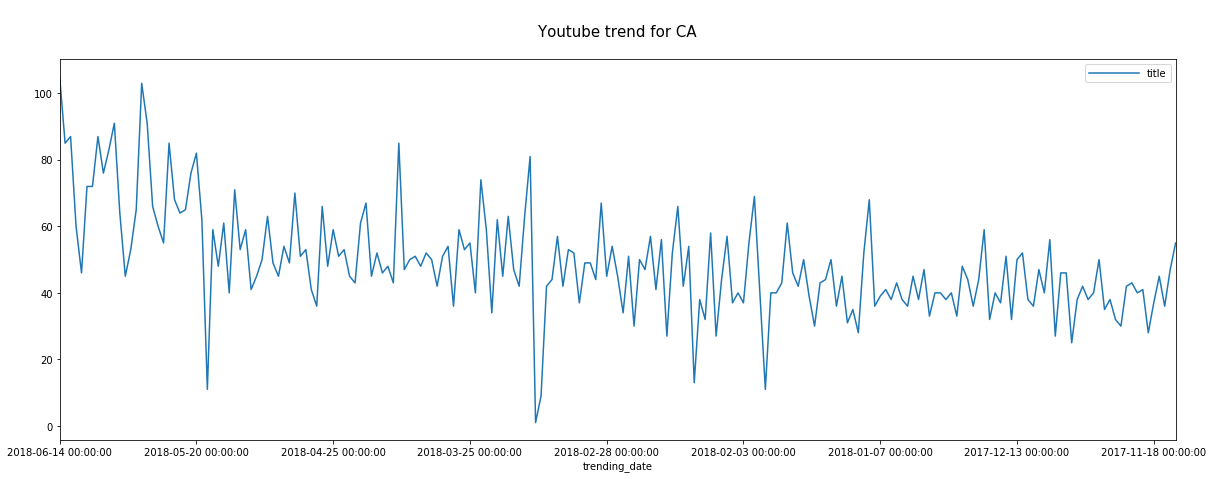

In [19]:
country = "CA"
data[data["country"] == country][["title", "trending_date"]].groupby("trending_date").count().sort_index(ascending=False).plot.line(figsize=(20,7))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


- The following bar graph depicts that the videoes have been watched in Canada mostly in May 2018 and this number has dropped in June 2018.

C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


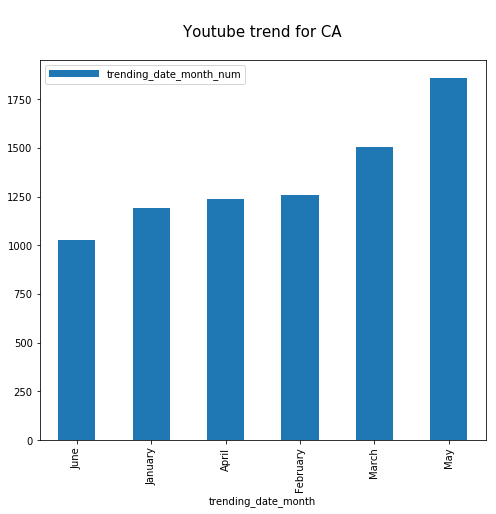

In [20]:
country = "CA"
data_canada = data[data["country"] == country]
data_canada[data_canada["trending_date_year"] == 2018 ][["trending_date_month", "trending_date_month_num"]].groupby(["trending_date_month"]).count().sort_index(by = "trending_date_month_num").plot.bar(figsize=(8,7))
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


- The below grpah shows that YouTube videos have been visited mostly in Tuesday and Thursday in Canada based on the data for first six months of 2018 and year of 2017.

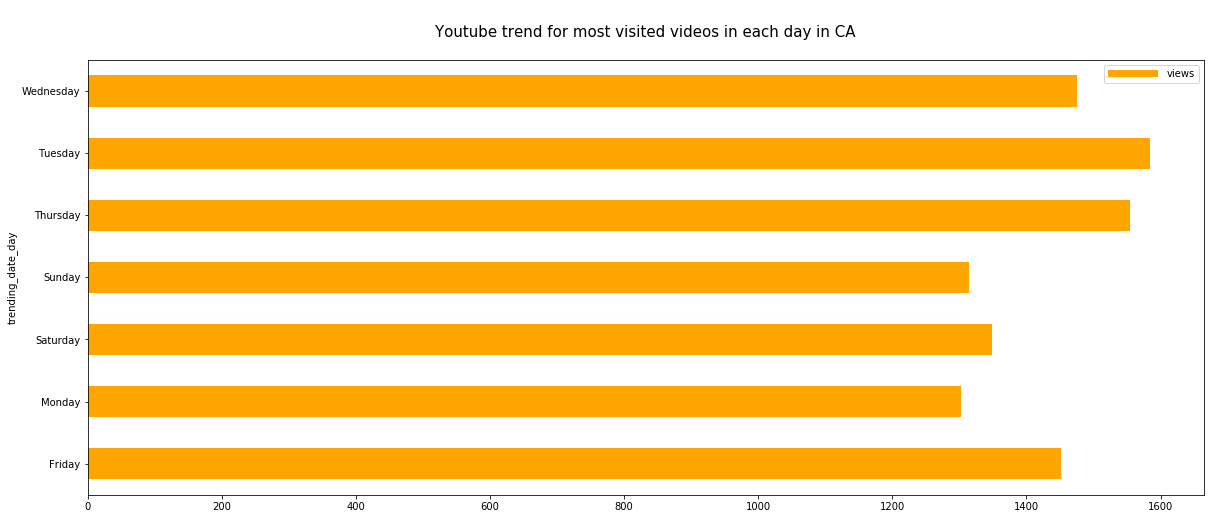

In [21]:
country = "CA"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").count().plot.barh(figsize=(20,8), color= "orange")

plt.title("\nYoutube trend for most visited videos in each day in "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


The number of top trending videos have been increased dramatically in May and June of 2018.

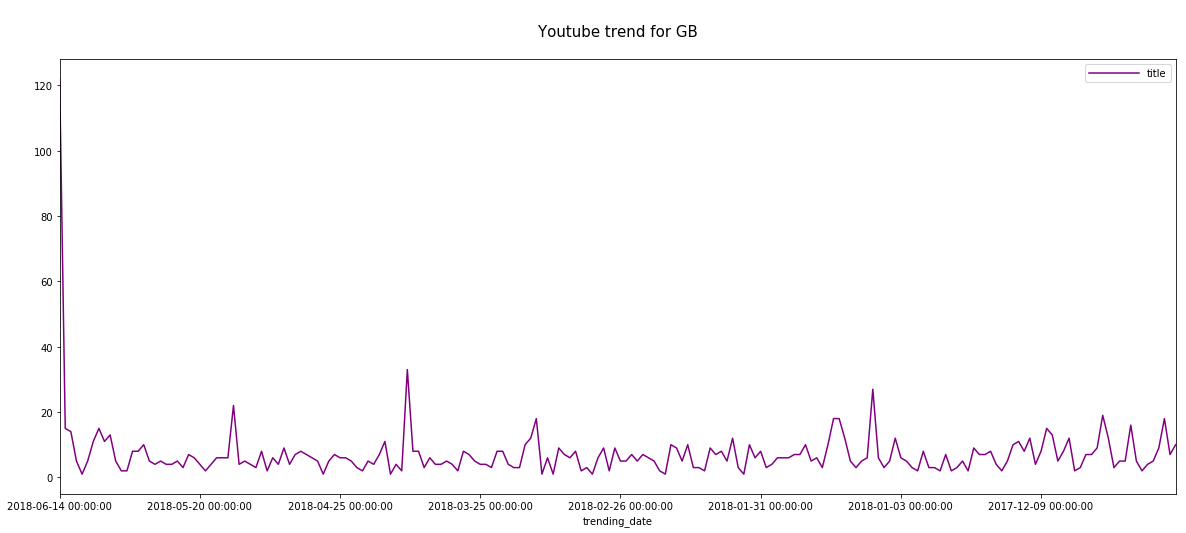

In [22]:
country = "GB"
data[data["country"] == country][["title", "trending_date"]].groupby("trending_date").count().sort_index(ascending=False).plot.line(figsize=(20,8), color = "purple")
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()

### Youtube trend for most visited videos in each months in the first half year of 2018 in India

C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


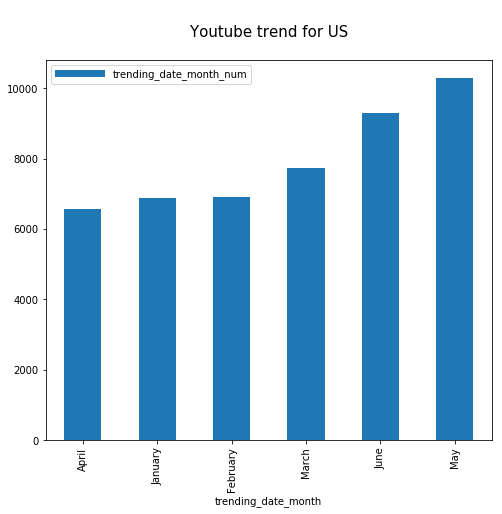

In [23]:
country = "US"
data_canada = data[data["country"] == country]
data[data["trending_date_year"] == 2018 ][["trending_date_month", "trending_date_month_num"]].groupby(["trending_date_month"]).count().sort_index(by = "trending_date_month_num").plot.bar(figsize=(8,7))
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


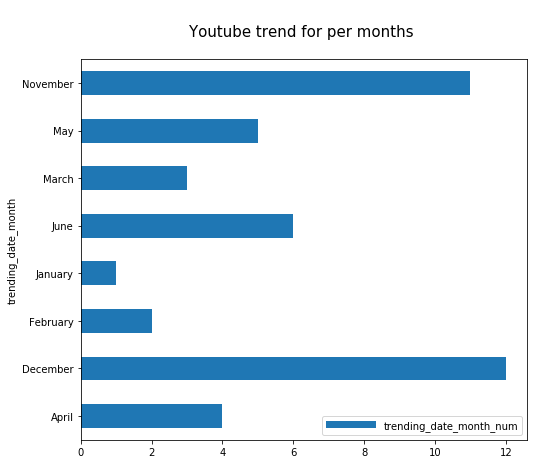

In [24]:

data[["trending_date_month", "trending_date_month_num"]].groupby(["trending_date_month"]).mean().plot.barh(figsize=(8,7))
#.plot.kde(figsize=(12,10))

plt.title("\nYoutube trend for per months \n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


### Youtube trend for most visited videos in each day in Denamrk

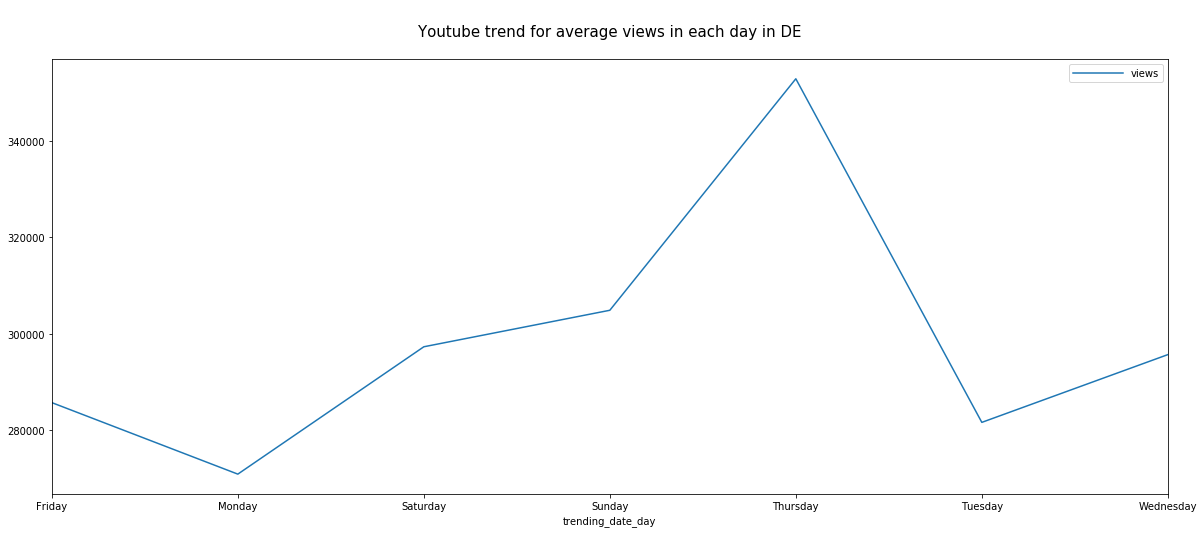

In [25]:
country = "DE"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").mean().plot.line(figsize=(20,8))

plt.title("\nYoutube trend for average views in each day in "+ country +"\n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


Text(0.5,1,'\nYoutube trend for average views in each day in CA\n')

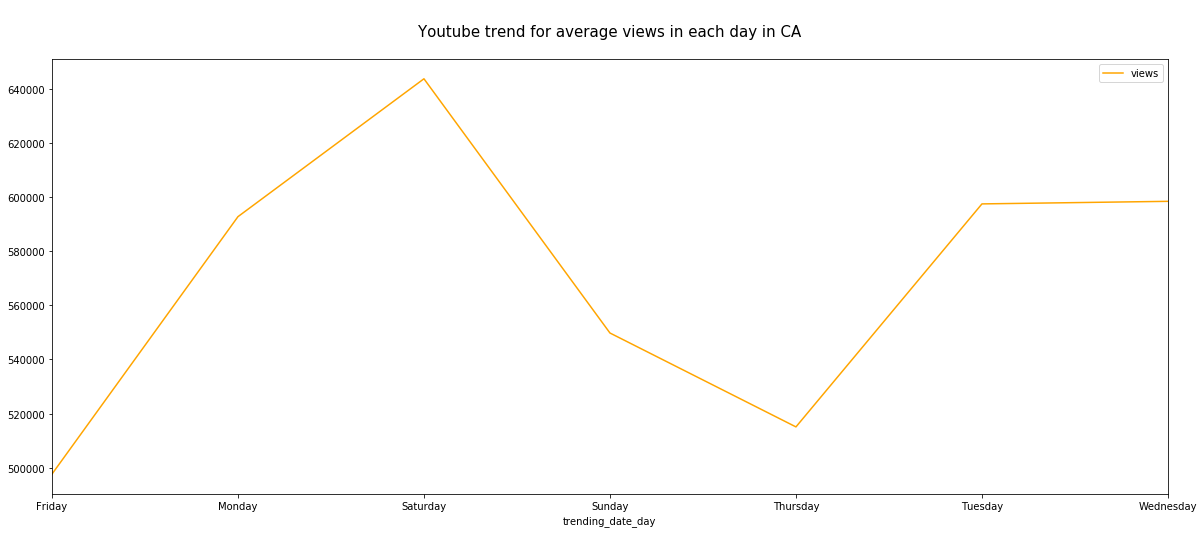

In [26]:
country = "CA"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").mean().plot.line(figsize=(20,8), color= "orange")
plt.title("\nYoutube trend for average views in each day in "+ country +"\n", fontsize=15)

Text(0.5,1,'\nYoutube trend for average views in each day in US\n')

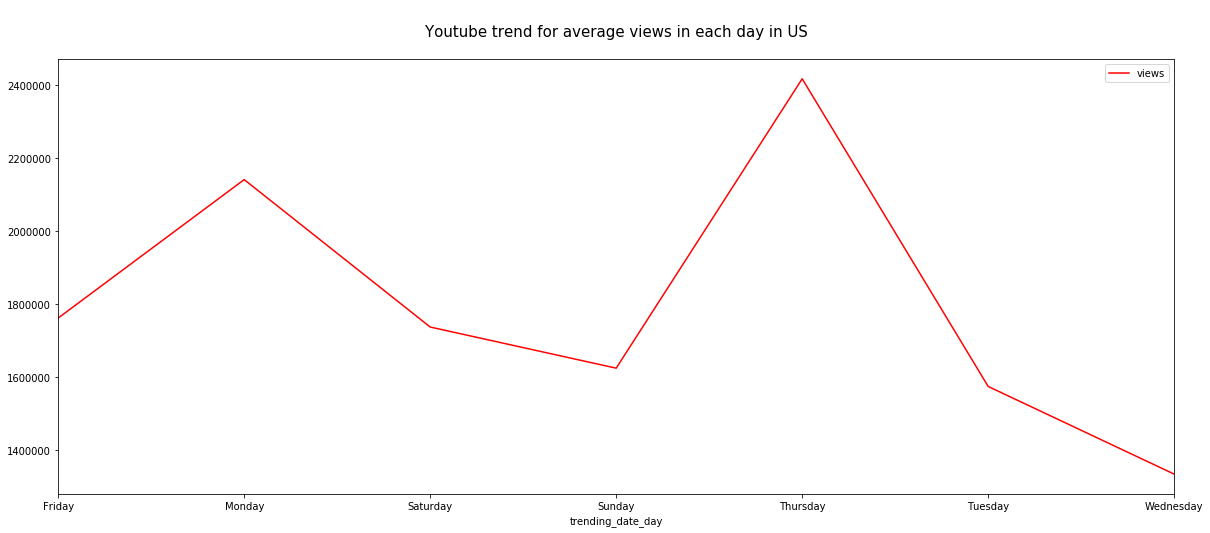

In [27]:
country = "US"
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").mean().plot.line(figsize=(20,8), color= "red")
plt.title("\nYoutube trend for average views in each day in "+ country +"\n", fontsize=15)

- The following graph shows Youtube trend for most visited videos in each day for each country. As per graph, most of videos in these countries have been watch on Tuesdays, Thursdays or Wednesdays.

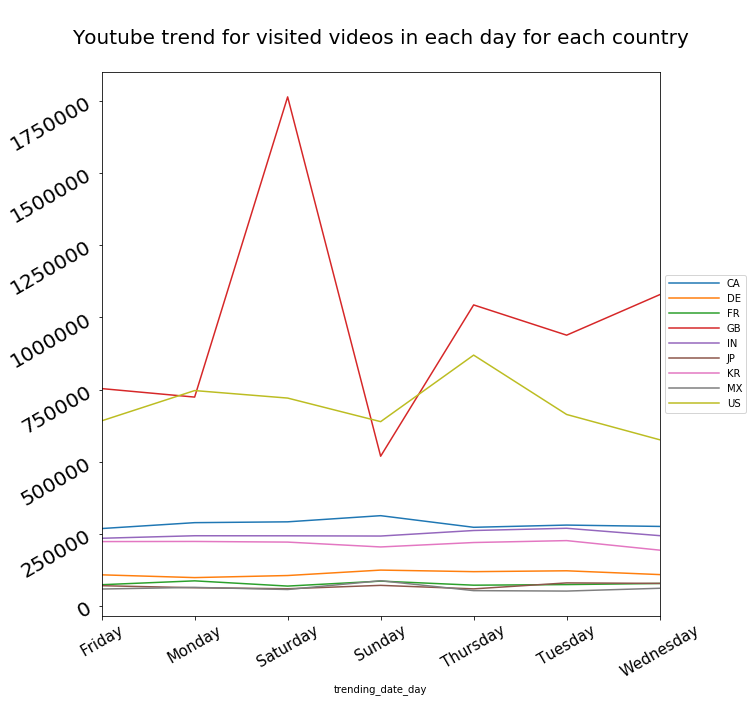

In [28]:
data.groupby(["trending_date_day","country"]).median()["views"].unstack().plot.line(figsize=(10,10))
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=15) 
plt.title("\nYoutube trend for visited videos in each day for each country\n", fontsize=20)
plt.legend(handlelength=5, fontsize  = 10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
data[data["country"] == country][["views", "trending_date_day"]].groupby("trending_date_day").count().sort_values(by="views")

,views
trending_date_day,
Saturday,321
Sunday,342
Friday,352
Monday,392
Wednesday,438
Tuesday,476
Thursday,575


In [30]:
bad_channel_title=data[data["channel_title"]=="???????? ?????"].index

In [31]:
data.shape

(58770, 37)

In [32]:
data=data.drop(bad_channel_title)

In [33]:
data.shape

(58603, 37)

### Top 25 Channels

- Top 25 Youtube video channel that have been watched mostly have been represented in following graph.

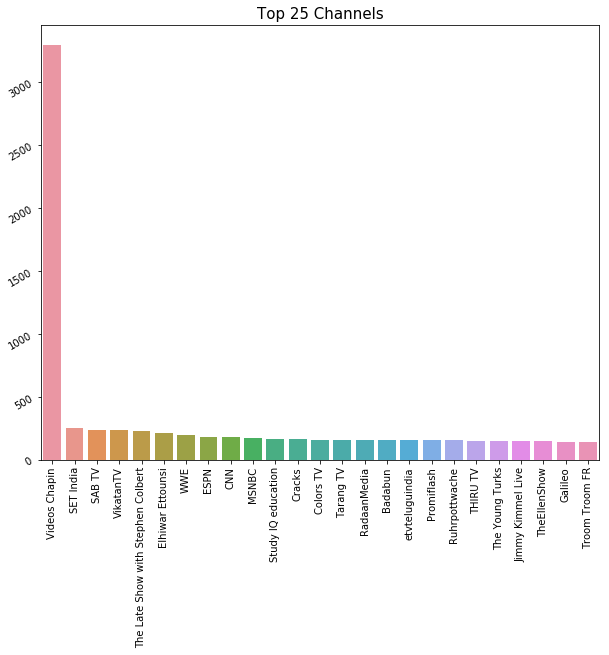

In [34]:
x = data.channel_title.value_counts().head(25).index
y = data.channel_title.value_counts().head(25).values
title = "Top 25 Channels"
plt.figure(figsize = (10,8))
sns.barplot(x = x, y = y )
plt.title(title , fontsize=15)
plt.yticks(rotation=30, fontsize=10) 
plt.xticks(rotation=90, fontsize=10) 
plt.xticks(rotation = 90)
plt.show()

- The below bar chart shows that if the video has entertainment content, then there is more chance to be watched more. News, Sport and Blogs videos are following entertainment.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022470CF8278>], dtype=object)

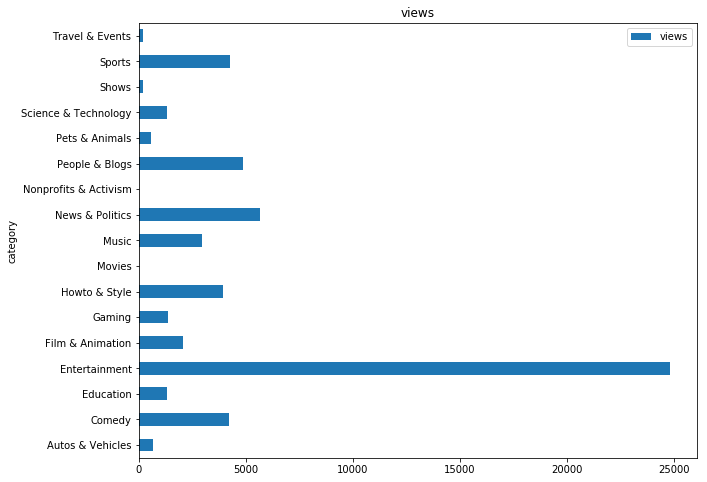

In [35]:
data[["views", "category"]].groupby("category").count().plot.barh(figsize=(10,8),subplots=True )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002247162C080>], dtype=object)

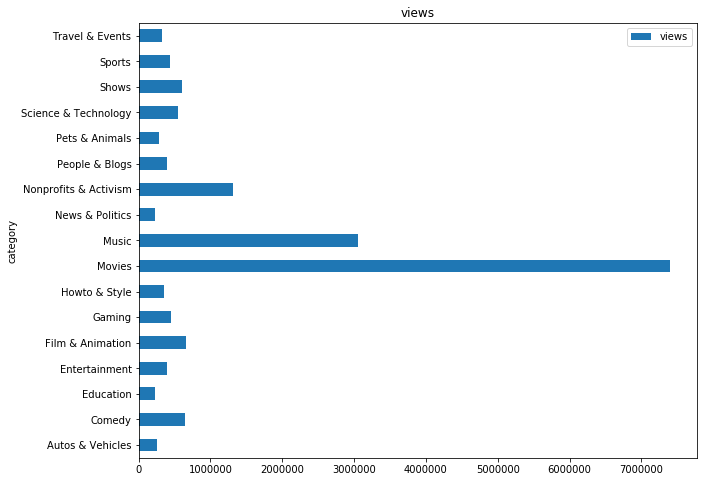

In [36]:
data[["views", "category"]].groupby("category").mean().plot.barh(figsize=(10,8),subplots=True )

### Different category of videos from different Country

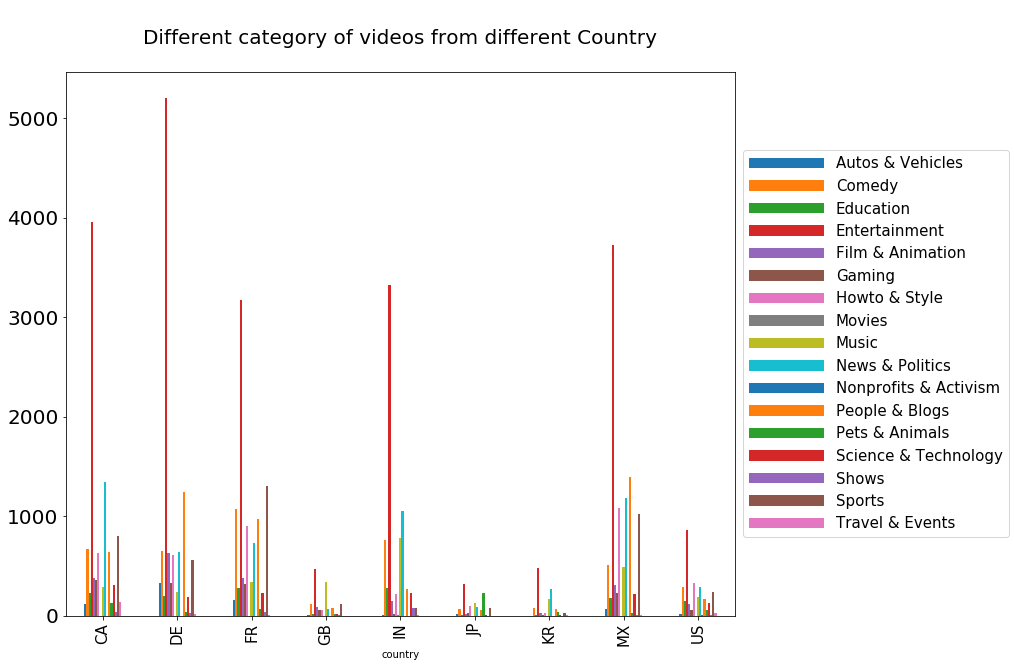

In [37]:
data.groupby(["country", "category"]).count()["video_id"].unstack().plot.bar(figsize=(12,10))
plt.yticks( fontsize=20) 
plt.xticks( fontsize=15) 
plt.title("\nDifferent category of videos from different Country\n", fontsize=20)
plt.legend(handlelength=5, fontsize  = 15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Different category of videos from different Country - Median

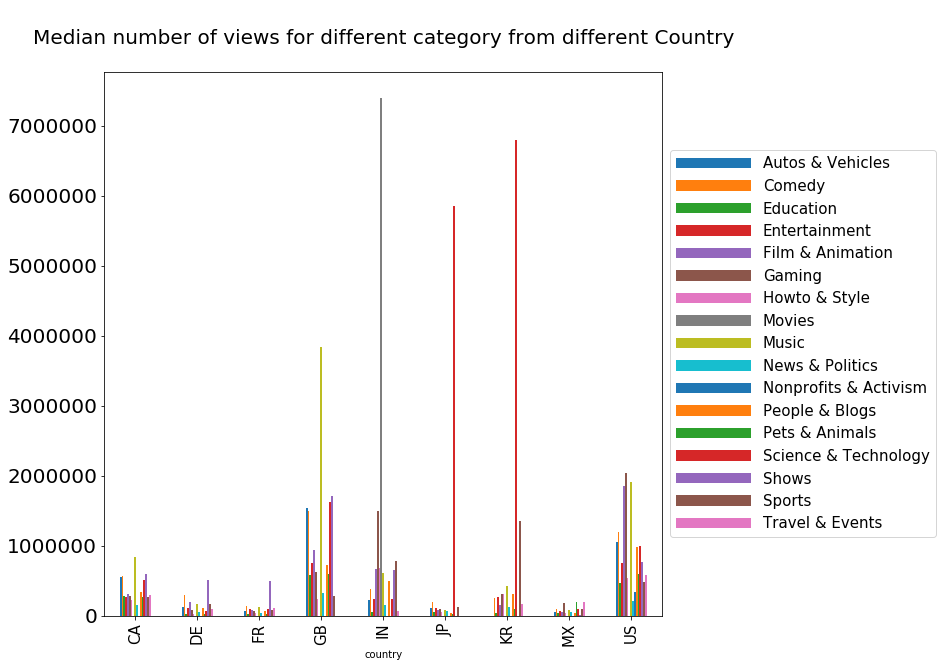

In [38]:
data.groupby(["country","category"]).median()["views"].unstack().plot.bar(figsize=(10,10))
plt.yticks( fontsize=20) 
plt.xticks( fontsize=15) 
plt.title("\nMedian number of views for different category from different Country\n", fontsize=20)
plt.legend(handlelength=5, fontsize  = 15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

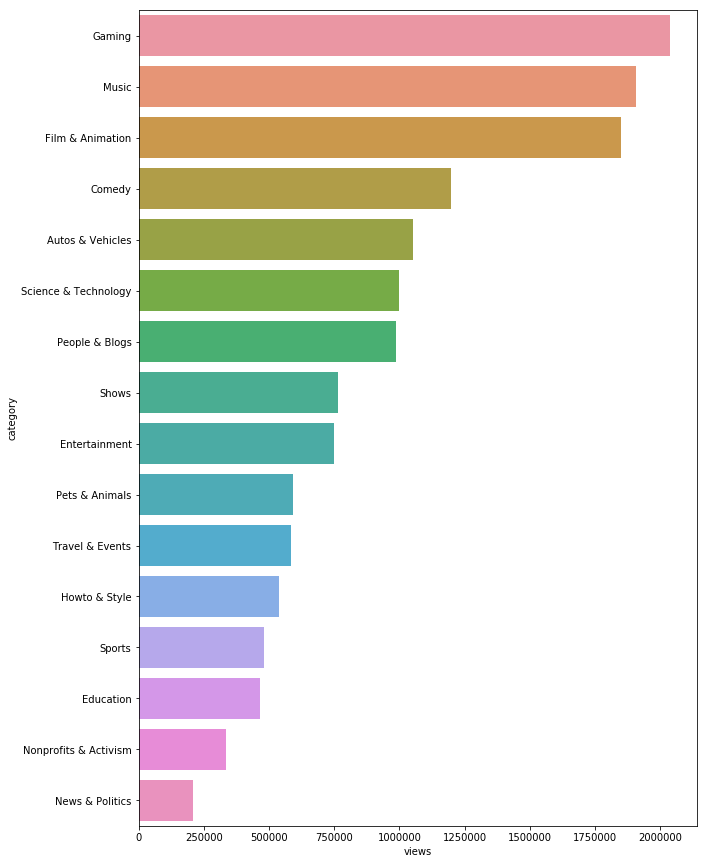

In [39]:
us_data = data [data["country"]=="US"]
views_us_category = us_data.groupby('category').median()['views'] 
views_us_category = views_us_category.sort_values(ascending=False).reset_index()
views_us_category.columns = ['category','views']
plt.subplots(figsize=(10, 15))
sns.barplot(x="views", y="category", data=views_us_category,
            label="Views-Comments Ratio")

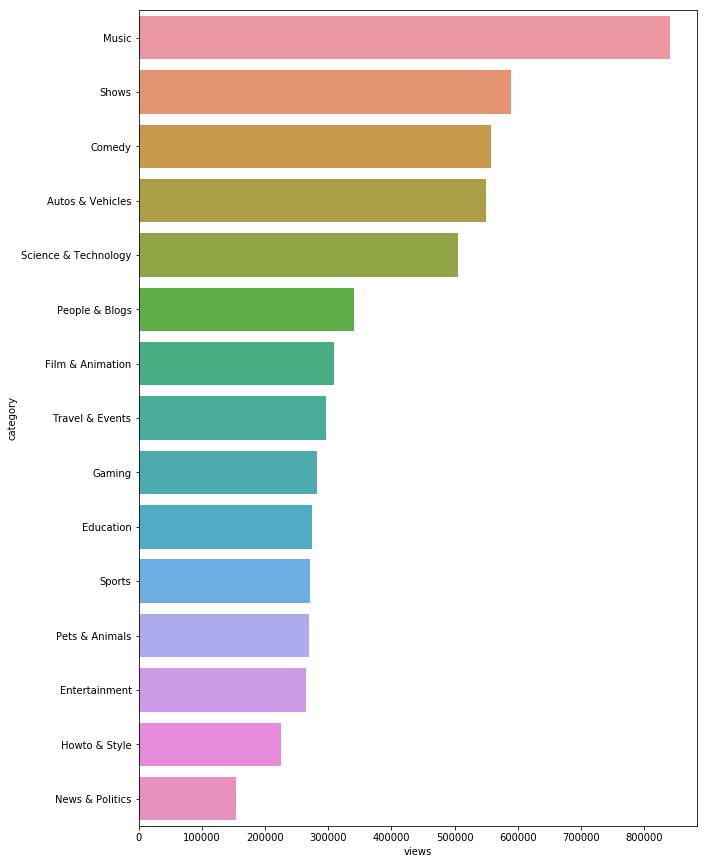

In [40]:
ca_data = data [data["country"]=="CA"]
views_ca_category = ca_data.groupby('category').median()['views'] 
views_ca_category = views_ca_category.sort_values(ascending=False).reset_index()
views_ca_category.columns = ['category','views']
plt.subplots(figsize=(10, 15))
sns.barplot(x="views", y="category", data=views_ca_category,
            label="Views-Comments Ratio")

### Views-Comments Ratio

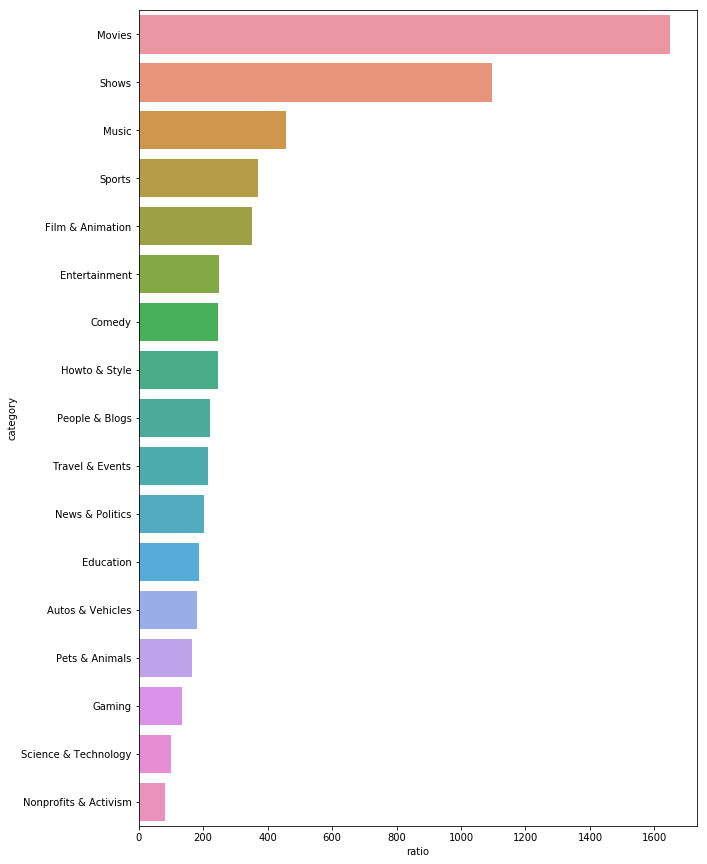

In [41]:
views_comment_ratio = data.groupby('category')['views'].agg('sum') / data.groupby('category')['comment_count'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=views_comment_ratio,
            label="Views-Comments Ratio")

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EliEm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

C:\Users\EliEm\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
category_list =data['category'].unique().tolist()

MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities = list()

Text(0.5,1,'Polarity of Categories in Youtube videos')

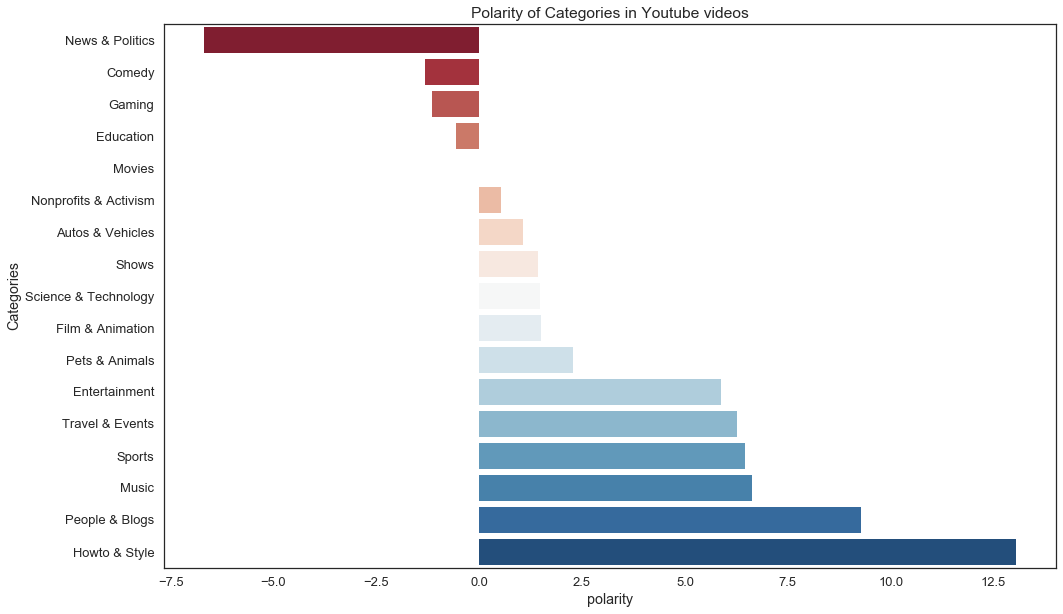

In [9]:
for cate in category_list:
    tags_word = data[data['category']==cate]['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("polarity")
plt.ylabel("Categories")
plt.title("Polarity of Categories in Youtube videos")

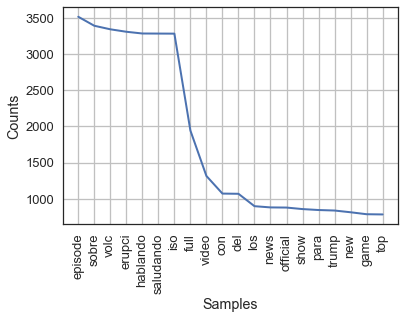

In [10]:
title_word = data['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
hnhk = pd.DataFrame(word_dist.most_common(MAX_N),columns=['Word', 'Frequency'])
word_dist.plot(20,cumulative=False)

In [11]:
list_of_popular_words = hnhk[hnhk['Frequency']>100]['Word'].tolist()
df_popular_title = pd.DataFrame(columns = data.columns)

for word in list_of_popular_words:
    tmp = pd.DataFrame(columns = data.columns)
    tmp = data[data['title'].str.contains(" " +word+" ")]
    #tmp = data[re.search(r"word$", data['title'])]
    tmp['popular_word_in_title'] = word
    df_popular_title = df_popular_title.append(tmp)
    


C:\Users\EliEm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022355DBA0B8>], dtype=object)

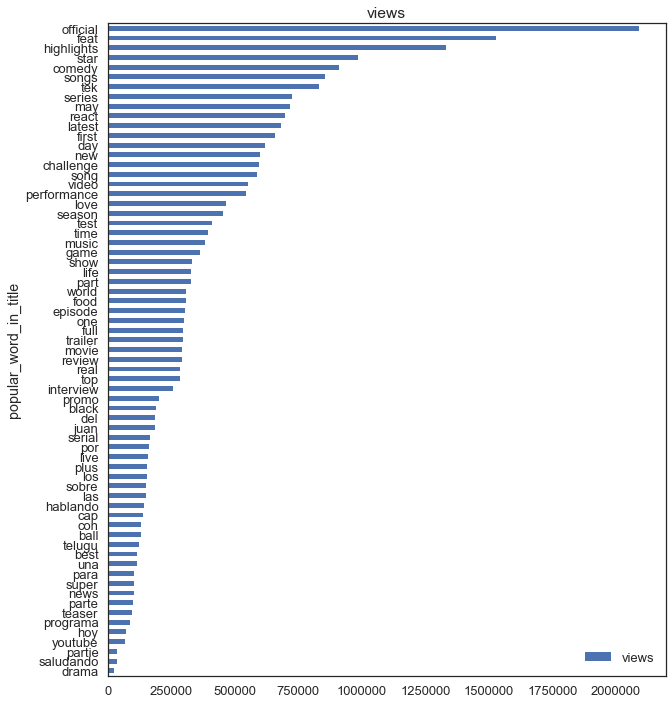

In [13]:
df_popular_title[["views", "popular_word_in_title"]].head(4000).groupby("popular_word_in_title").mean().sort_values(by = "views").plot.barh(figsize=(10,12),subplots=True )

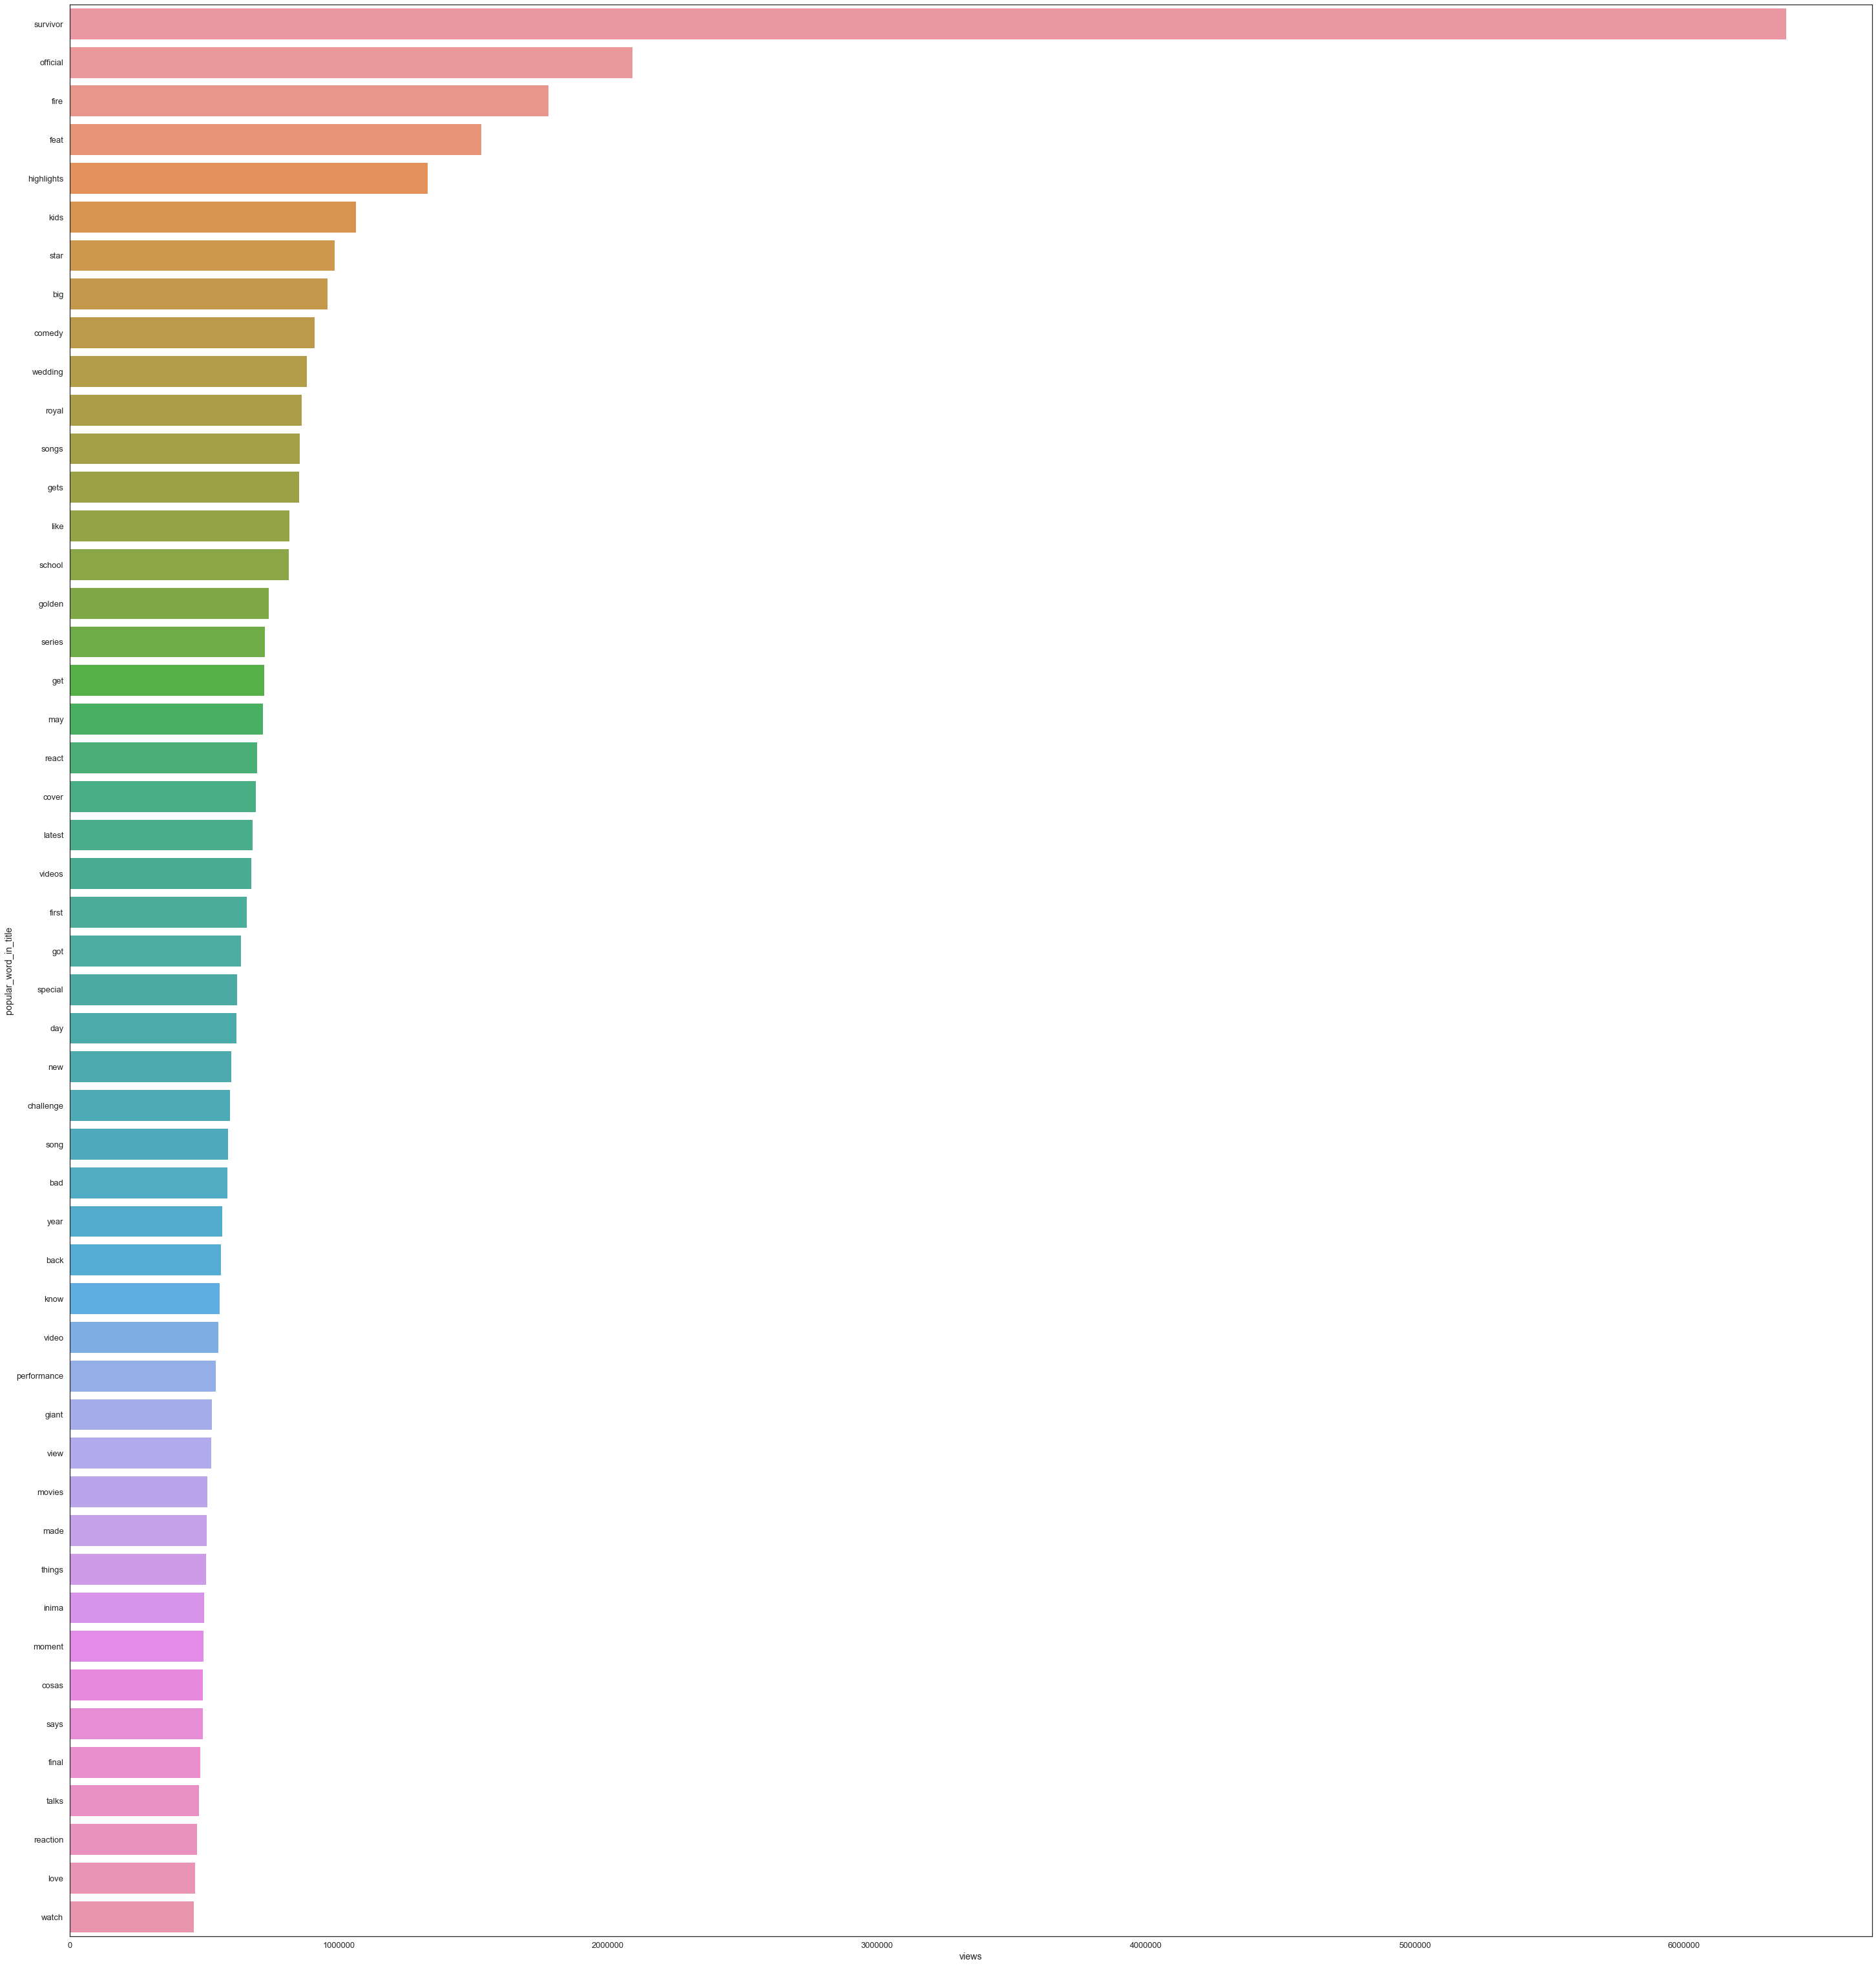

In [14]:

views_popular_title = df_popular_title.groupby('popular_word_in_title').mean()['views']
views_popular_title = views_popular_title.sort_values(ascending=False).reset_index()
views_popular_title.columns = ['popular_word_in_title','views']
plt.subplots(figsize=(50, 55))
sns.barplot(x="views", y="popular_word_in_title", data=views_popular_title.head(50),
            label="Views-popular words in video title")

In [95]:
df_popular_title[['video_id','title','views','popular_word_in_title']].to_csv('D:/DataScienceFoundation/SpringBoard/YouTube Project/youtube-new/popular_title.csv')

In [11]:
import re
from nltk import  word_tokenize
from  nltk import word_tokenize,sent_tokenize

def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')



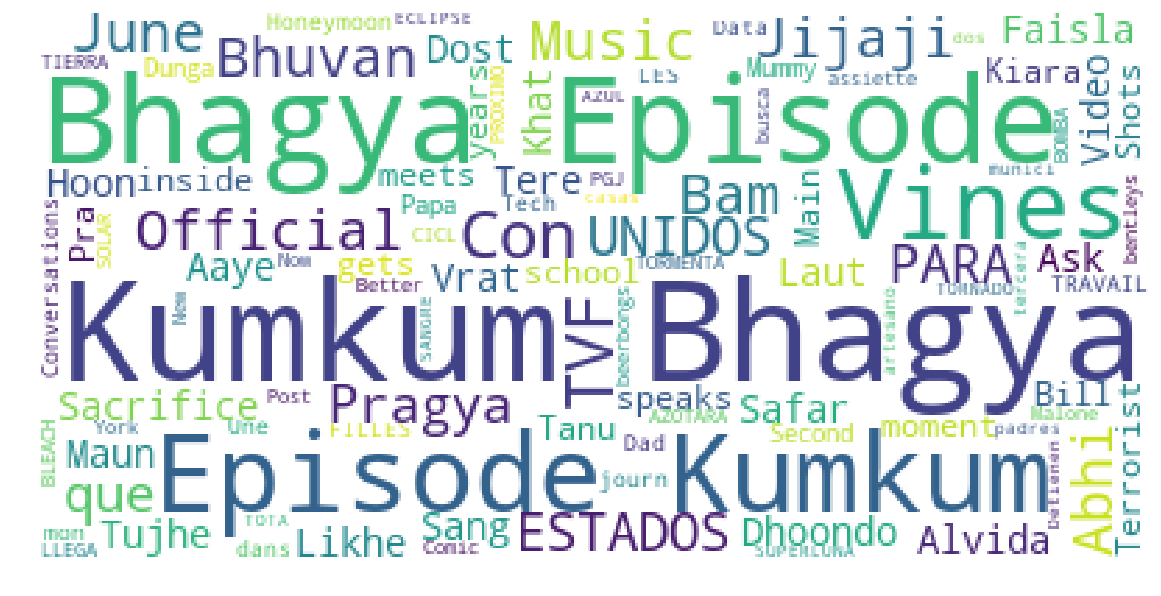

In [12]:
title_word = str(data['title'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

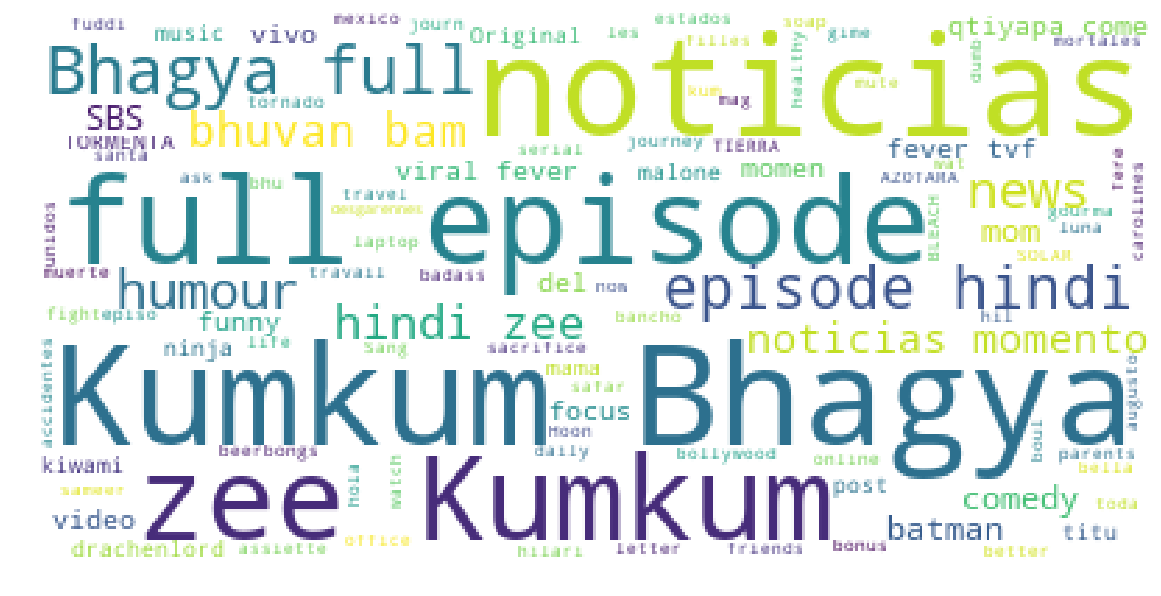

In [13]:
title_word = str(data['tags'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

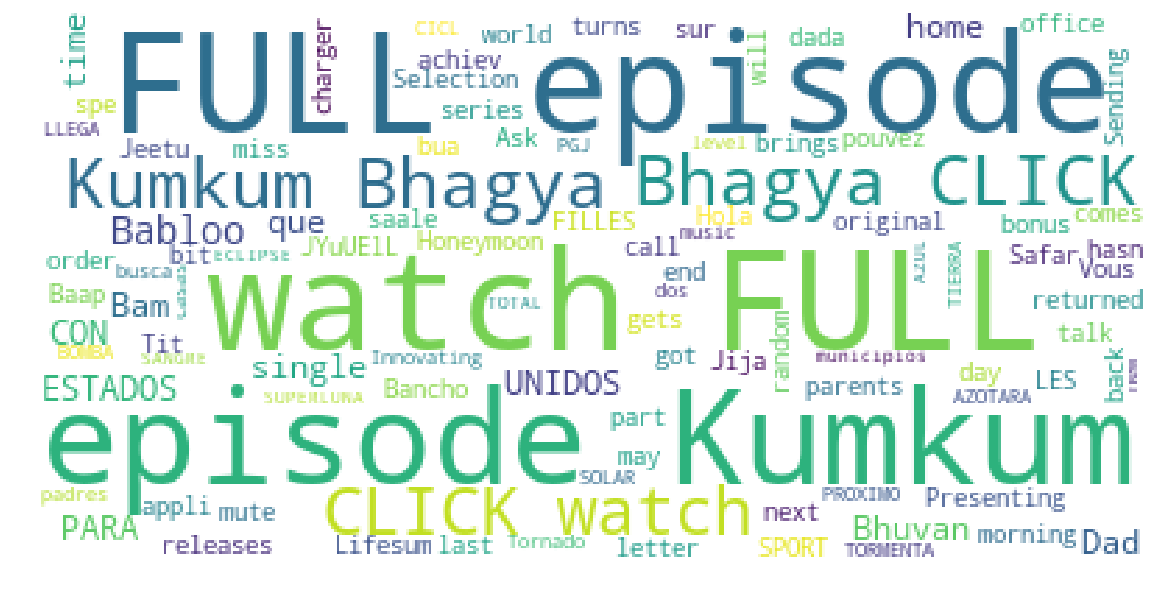

In [14]:
title_word = str(data['description'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

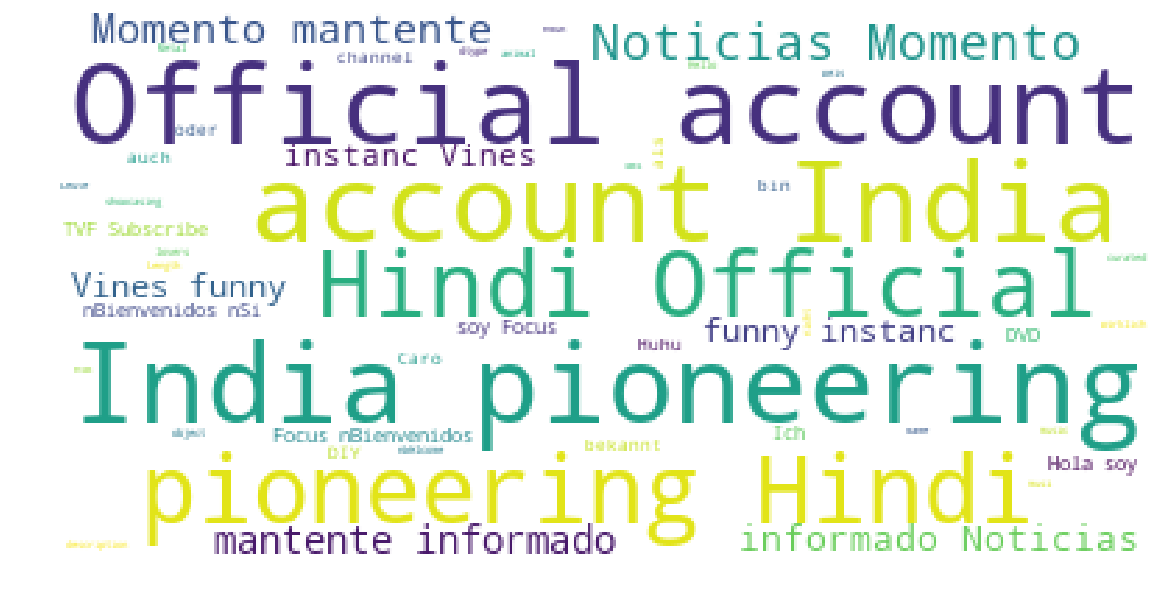

In [15]:
title_word = str(data['channel_description'])

title_word = re.sub('[^A-Za-z]+', ' ', title_word)
word_tokens = word_tokenize(title_word)
en_stopwords = set(STOPWORDS)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

In [50]:
from scipy.stats import normaltest
statistic, p_val = normaltest(views)
views = np.array(data['views'])
mean, std = np.mean(views), np.std(views)

print('mean and standard deviation for youtube views are: ',mean, std)

print('chi-square statistic:',statistic)
print('p value with assumtion the view is normal is ',p_val)
print('Since the p-value is less than alpha=0.05 then we can reject the null hypothesis which was the view distribution is normal ')

mean and standard deviation for youtube views are:  539580.01633 3334221.56025
chi-square statistic: 194821.653002
p value with assumtion the view is normal is  0.0
Since the p-value is less than alpha=0.05 then we can reject the null hypothesis which was the view distribution is normal 


#### P_VALUE is zero, then we can say the distributation is not normal

#### The normal graph has been displayed to show views in YouTube data is not normal distribution.

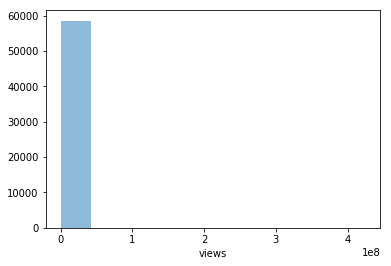

In [51]:
numbins = 100
mybins = np.linspace(views.min(), views.max(), numbins)
myhist = np.zeros(numbins-1, dtype='float64')


plt.hist(views ,alpha=0.5)
plt.xlabel('views')
plt.show()

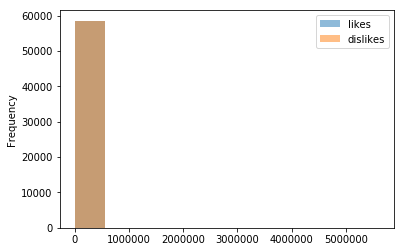

In [52]:
data[['likes', 'dislikes']].plot.hist(alpha=0.5)

plt.show()

In [53]:
mean_data = np.mean(data['views'])
std = np.std(data['views'])
std_err = std / math.sqrt(len(data['views']))

In [54]:
from scipy.stats import norm
import math

z_value = 1.96
mean = np.mean(data['views'])
std = np.std(data['views'])
std_err = std / math.sqrt(len(data['views']))
margin_err = z_value * std_err
#margin_err = (conf_int[1]-conf_int[0])*0.5
conf_int = (mean - margin_err, mean + margin_err)

print('Standard Error (SE) = %.3f' %std_err)
print('Margin of Error (Bootstrap Method) = %.3f' %margin_err)
print('99.9%% Confidence interval[%.2f, %.2f]' %(conf_int[0], conf_int[1]))

Standard Error (SE) = 13773.190
Margin of Error (Bootstrap Method) = 26995.452
99.9% Confidence interval[512584.56, 566575.47]


### Bootstrap Test: the hypothesis is the mean of views are 300000

In [55]:
def diff_from_hypo(data, views = 500000): # 539580.02
    return np.mean(data) - 500000

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [56]:
bs_replicates = draw_bs_reps(data['views'], np.mean, 10000)
conf_int = np.percentile(bs_replicates, [0.05, 99.95])
conf_int
print('99.9%% Confidence interval is = [%.3f, %.3f]' %(conf_int[0], conf_int[1]))

99.9% Confidence interval is = [499614.790, 586740.273]


In [58]:
sample = np.random.choice(data['views'], 1000)
diff_val = diff_from_hypo(sample, 500000)
sample_shifted = sample - np.mean(sample) + 500000

In [59]:
bs_replicates = draw_bs_reps(sample_shifted, diff_from_hypo, 10000)
p_value = np.sum(bs_replicates <= diff_val) / len(bs_replicates)
p_value

0.0033999999999999998

In [60]:
from statsmodels.stats.weightstats import ztest

ztest(sample, value = 500000)

(-2.4636107232263984, 0.013754540519936938)

In [61]:
from scipy.stats import ttest_1samp

ttest_1samp(data['views'], 500000)

Ttest_1sampResult(statistic=2.8736755481900143, pvalue=0.0040587132877704562)

#### Because the sample size is greater than 30, z-test is correct. We can accept the null- hypothesis. 

In [62]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

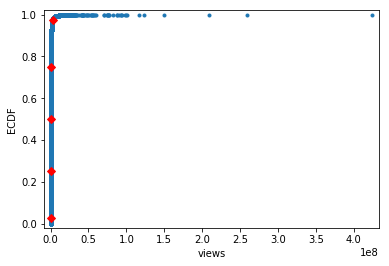

In [63]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(data['views'])
sigma = np.std(data['views'])

x_cl, y_cl = ecdf(data['views'])


_ = plt.plot(x_cl, y_cl, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('views')

# overlay percentiles as red diamonds
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_cl = np.percentile(data['views'], percentiles)
_ = plt.plot(ptiles_cl, percentiles/100, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()

In [64]:

# creating 1D array for linear regression
views_arr = data[data["trending_date_year"]==2018]['views'].values.flatten()
likes_arr = data[data["trending_date_year"]==2018]['likes'].values.flatten()

slope = 0.0160857776165 views count / likes count
intercept = 7092.45608037


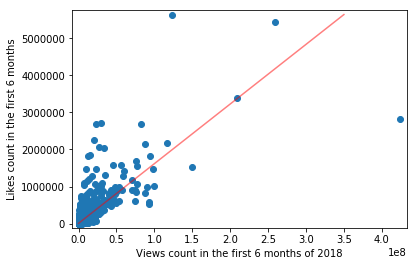

In [65]:
# plot scatter plot of billing history vs payment history
_ = plt.scatter(views_arr, likes_arr)
plt.margins(0.02)
plt.xlabel('Views count in the first 6 months of 2018')
plt.ylabel('Likes count in the first 6 months')

# perform linear regression
a, b = np.polyfit(views_arr, likes_arr, 1)

#print results to the screen
print('slope =', a, 'views count / likes count')
print('intercept =', b)

# Make theoretical line to plot
x_1 = np.array([0,350000000])
y_1 = a * x_1 + b

# add regression line to the plot
_ = plt.plot(x_1, y_1, color='red', alpha=0.5)

plt.show()